# Курсовая работа
# Коротков М.А.

In [1]:
import pandas as pd
import scipy
import numpy as np
from time import time
import matplotlib.pyplot as plt
import seaborn as sns

# Описание поставленной задачи и описание используемого датасета:

В ходе данной курсовой работы будет рассмотрена задача оценки активов при помощи машинного обучения. Данный вид задачи стоит отнести к такому типу задач машинного обучения, как регрессия. В качестве активов в данной работе будут рассматриваться квартиры в городе Москва, а в качестве предсказываемого объекта будет выступать цена на ту или иную квартиру. Датасет 'flats.csv', используемый в работе, был собран при помощи парсинга с сайта 'cian.ru'. Были найдены квартиры по всем округам Москвы. Так в датасете в столбце District: 0 обозначает Центральный округ(ЦАО), 1- северный(САО), 2 - СЗАО, 3 - ЗАО, 4 - ЮЗАО, 5 - ЮАО, 6 - ЮВАО, 7 - ВАО, 8 - СВАО, 9 - Новомосковский округ, 10 - Троицкий округ, 11 - Зеленоградский округ. Также стоит описать и остальные параметры датасета. Столбец Price отвечает за цену квартиры. Столбцы Lat,Lon показывают географические координаты (широта, долгота) той или иной квартиры. Столбец Small_district отображает район Москвы, в котором располагается квартира, например, Митино, Соколиная гора, Измайлово и тд. В столбцe Floor можно найти информацию о том, на каком этаже расположена квартира, а столбец Nfloors показывает общее количество этажей в доме. Информацию о самой квартире помошают узнать такие признаки, как Rooms - количество комнат в квартире, Totsp - общая площадь квартиры в кв.м., Livsp - жилая площадь в кв.м., Kitsp - кухонная площадь в кв.м., Bal - наличие в квартире балкона (1 - балкон есть, 0 - нет). Также важным аспектом при выборе квартиры является ее расположение от метро, а также время, которое человек будет тратить по пути в метро. Данную информацию нам предоставляют столбцы Metrdist - дальность квартиры от метро в минутах, Walk - каким образом стоит добираться до метро( 1 - пешком, 0 - на транспорте), Stname - название ближайшей станции метрополитена. Осталось объяснить лишь некоторые из столбцов выбранного датасета. Столбец Brick дает информацию о типе дома, 1 для кирпичных, монолитных и железобетонных домов, 0 для других. Столбец Tel дает информацию о наличии телефона на объявлении той или иной квартиры, 1 - телефон есть, 0 - нет. Также в строке для каждой квартиры присутствует ссылка на сайте ЦИАН, посвященная определенной квартире, все ссылки образуют столбец Link. Столбец New предоставляет информацию о рынке: 1 - первичный, 0 - вторичный рынок. И, наконец, последний столбец Price_dublicate был создан для проверки правильности сбора данных, забегая вперед, можно сказать, что данный столбец не будет принимать никакого участие в дальнейшей работе.  

Для успешного построения моделей был намечен определенный план действий:

1). Предварительный анализ данных, в котором будет проведена работа по чистке датасета от ненужных признаков, а также восстановление пропущенных значений.

2). Визуализация данных, поиск зависемостей между признаками, поиск и работа с аномальными значениями.

3). Построение наиболее успешных моделей машинного обучения.

4). Выбор лучшей из рассмотренных моделей.

5). Улучшение выбранной модели при помощи различных методах, о которых будет сказано позже

6). Визуализация полученных в ходе курсовой работы результатов, а также представление выводов по работе.

# Предварительный анлиз данных
# Работа с признаками

In [2]:
'''Импорт данных по квартирам'''

'Импорт данных по квартирам'

In [3]:
df = pd.read_csv('flats.csv')
df.head()

,Unnamed: 0,Lat,Lon,District,Small_district,Rooms,Price,Price_duplicate,Totsp,Livesp,...,Stname,Metrdist,Walk,Brick,Tel,Bal,Floor,Nfloors,New,Link
0,1,55.536573,37.158982,10,NaN,2,6800000.0,6800000.0,73.2,14.4,...,Тропарево,15.0,0.0,NaN,0,1,3.0,4.0,0,http://www.cian.ru/sale/flat/148936137/
1,2,55.823156,37.500881,1,NaN,2,9600000.0,9600000.0,55.0,10.0,...,Войковская,5.0,1.0,NaN,0,0,3.0,6.0,0,http://www.cian.ru/sale/flat/2462671/
2,3,55.878750,37.538587,1,NaN,2,7529815.0,7529815.0,61.2,NaN,...,NaN,NaN,NaN,NaN,0,1,2.0,21.0,1,http://www.cian.ru/sale/flat/43992990/
3,4,55.739336,37.705275,4,Нижегородский,1,4150000.0,4150000.0,30.0,6.5,...,Авиамоторная,24.0,1.0,1.0,1,0,1.0,5.0,0,http://www.cian.ru/sale/flat/151019032/
4,5,55.670757,37.587712,6,Котловка,2,6000000.0,6000000.0,42.0,NaN,...,Профсоюзная,5.0,0.0,0.0,0,1,5.0,5.0,0,http://www.cian.ru/sale/flat/151011793/


Заметим, что в датасете присутствует дублирующийся столбец с ценой, можем удалить один из них.

In [4]:
del df['Price_duplicate']

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8979 entries, 0 to 8978
Data columns (total 20 columns):
Unnamed: 0        8979 non-null int64
Lat               8979 non-null float64
Lon               8979 non-null float64
District          8979 non-null int64
Small_district    5180 non-null object
Rooms             8979 non-null int64
Price             8939 non-null float64
Totsp             8979 non-null float64
Livesp            4685 non-null float64
Kitsp             8127 non-null float64
Stname            7754 non-null object
Metrdist          7754 non-null float64
Walk              7754 non-null float64
Brick             5180 non-null float64
Tel               8979 non-null int64
Bal               8979 non-null int64
Floor             8977 non-null float64
Nfloors           8875 non-null float64
New               8979 non-null int64
Link              8979 non-null object
dtypes: float64(11), int64(6), object(3)
memory usage: 1.4+ MB


Посмотрим какое количество данных пропущено в каждом из столбцов

In [6]:
for col in df.columns:
    print(f"{df[col].isna().sum()} NaN elements in {col} feature")

0 NaN elements in Unnamed: 0 feature
0 NaN elements in Lat feature
0 NaN elements in Lon feature
0 NaN elements in District feature
3799 NaN elements in Small_district feature
0 NaN elements in Rooms feature
40 NaN elements in Price feature
0 NaN elements in Totsp feature
4294 NaN elements in Livesp feature
852 NaN elements in Kitsp feature
1225 NaN elements in Stname feature
1225 NaN elements in Metrdist feature
1225 NaN elements in Walk feature
3799 NaN elements in Brick feature
0 NaN elements in Tel feature
0 NaN elements in Bal feature
2 NaN elements in Floor feature
104 NaN elements in Nfloors feature
0 NaN elements in New feature
0 NaN elements in Link feature


Всего в исследуемом датасете около 9000 строк. Исходя из этого удалим такие признаки, как Brick, Small_district,Livesp. 
Причиной, по которой мы можем так поступить, является то, что в данных двух столбцах пропущено около 40% данных. 
Восстановление потерянных данных может неблагоприятно сказаться на дальнейшей модели. Также удалим столбец Unnamed: 0, представляющий собой лишь порядковый номер квариры в датасете и столбец Tel тк наличие номера телефона не влияет на цену квартиры.   

In [7]:
df.drop(['Unnamed: 0','Small_district','Brick','Livesp','Tel'], axis =1, inplace =True)

Посмотрим, как теперь будет выглядеть наш набор данных

In [8]:
df.head()

,Lat,Lon,District,Rooms,Price,Totsp,Kitsp,Stname,Metrdist,Walk,Bal,Floor,Nfloors,New,Link
0,55.536573,37.158982,10,2,6800000.0,73.2,40.2,Тропарево,15.0,0.0,1,3.0,4.0,0,http://www.cian.ru/sale/flat/148936137/
1,55.823156,37.500881,1,2,9600000.0,55.0,35.0,Войковская,5.0,1.0,0,3.0,6.0,0,http://www.cian.ru/sale/flat/2462671/
2,55.878750,37.538587,1,2,7529815.0,61.2,NaN,NaN,NaN,NaN,1,2.0,21.0,1,http://www.cian.ru/sale/flat/43992990/
3,55.739336,37.705275,4,1,4150000.0,30.0,18.5,Авиамоторная,24.0,1.0,0,1.0,5.0,0,http://www.cian.ru/sale/flat/151019032/
4,55.670757,37.587712,6,2,6000000.0,42.0,31.0,Профсоюзная,5.0,0.0,1,5.0,5.0,0,http://www.cian.ru/sale/flat/151011793/


Удалим столбец Link,так как ссылка на квартиру на сайте Циан никак не влияет на итоговую цену актива. Кроме того, стоит отметить, что значения в данном столбце являются уникальными для каждой из квартир, что может плохо сказаться на дальнейших моделях.

In [9]:
del df['Link']

Первыми двумя столбцами в наборе данных являются географические координаты: широта и долгота каждой из квартир. При помощи данных признаков мы можем рассчитать расстояние от определенной точки в Москве до исследуемой квартиры. Будем искать расстояние до центра Москвы. Как известно, квартиры, расположенные ближе к центру, дороже. При вычислении будем использовать формулу расстояния между точками, зная координаты этих точек. Координаты центра Москвы: широта = 55.755831, долгота = 37.617673.

Напишем функцию для расчета расстояния до центра Москвы:

In [10]:
def dist_grabber(lat,lon):
    null_coords = (55.755831, 37.617673)
    
    '''Широта (latitude)'''
    lat1 = lat
    lat2 = null_coords[0]

    '''Долгота (longtude):'''
    lon1 = lon
    lon2 = null_coords[1]
    '''Поиск расстояния между заданными точками'''
    d = 100*np.sqrt((lon1-lon2)**2+(lat1-lat2)**2)
    return(d)

In [11]:
distance = []
for i in range(len(df['Lat'])):
    distance.append(dist_grabber(lat = df.iloc[i]['Lat'],lon = df.iloc[i]['Lon']))

Получив список расстояний, добавим его в набор данных, при этом удалив столбцы, содержащие координаты квартиры.

In [12]:
df['Distance'] = pd.DataFrame({'Distance': distance})

In [13]:
df.drop(['Lat','Lon'], axis =1, inplace =True)

In [14]:
df.head()

,District,Rooms,Price,Totsp,Kitsp,Stname,Metrdist,Walk,Bal,Floor,Nfloors,New,Distance
0,10,2,6800000.0,73.2,40.2,Тропарево,15.0,0.0,1,3.0,4.0,0,50.840093
1,1,2,9600000.0,55.0,35.0,Войковская,5.0,1.0,0,3.0,6.0,0,13.480737
2,1,2,7529815.0,61.2,NaN,NaN,NaN,NaN,1,2.0,21.0,1,14.616318
3,4,1,4150000.0,30.0,18.5,Авиамоторная,24.0,1.0,0,1.0,5.0,0,8.914143
4,6,2,6000000.0,42.0,31.0,Профсоюзная,5.0,0.0,1,5.0,5.0,0,9.019560


Кроме того, стоит обратить внимание на столбец, содержащий информацию по станции метро. Данный столбец влияет на цену примерно так же, как и район, в котором расположена квартира. Таким образом, данные столбцы зависимы между собой, а значит стоит удалить столбец Stname. Похожим примером, ярко иллюстрирующим приведенную выше мысль, служит зависимость между столбцами год и месяц. 

In [15]:
del df['Stname']

In [16]:
df.head()

,District,Rooms,Price,Totsp,Kitsp,Metrdist,Walk,Bal,Floor,Nfloors,New,Distance
0,10,2,6800000.0,73.2,40.2,15.0,0.0,1,3.0,4.0,0,50.840093
1,1,2,9600000.0,55.0,35.0,5.0,1.0,0,3.0,6.0,0,13.480737
2,1,2,7529815.0,61.2,NaN,NaN,NaN,1,2.0,21.0,1,14.616318
3,4,1,4150000.0,30.0,18.5,24.0,1.0,0,1.0,5.0,0,8.914143
4,6,2,6000000.0,42.0,31.0,5.0,0.0,1,5.0,5.0,0,9.019560


Теперь необходимо заполнить отсутствующие значения в некоторых столбцах

In [17]:
cols_change = []

for i in df.columns:
    if df[i].isna().sum() > 0:
        cols_change.append(i)
cols_change

['Price', 'Kitsp', 'Metrdist', 'Walk', 'Floor', 'Nfloors']

Требуется отредактировать 6 столбцов. Среди которых Price,Kitsp,Metrdist,Walk,Floor,Nfloors. Для признаков Metrdist,Walk заполним пропуски средним значением по столбцам, если их распределение является нормальным, в противном случае заменим нулями. 

In [18]:
from scipy import stats

In [19]:
stats.kstest(df['Metrdist'][df['Metrdist'].isnull() == False], 'norm')  ## не является нормальным распределением 

KstestResult(statistic=0.9767259337971035, pvalue=0.0)

In [20]:
stats.kstest(df['Walk'][df['Walk'].isnull() == False], 'norm')    ## не является нормальным распределением 

KstestResult(statistic=0.5, pvalue=0.0)

In [21]:
cols1 = ['Metrdist','Walk']
for col in cols1:
    df[col] = df[col].fillna(0)  ## заполняем числовые данные 0

Исходя из того, что столбец с ценой является предсказываемым, то нам необходимы точные значения в данном столбце. Кроме того, в данном столбце пропущено всего 40 значений, значит лучше будет просто удалить эти 40 строк

In [22]:
df = df.dropna(axis='index', how='any', subset=['Price'])

Теперь проведем обработку столбцов Floor, Nfloors. Стоит учесть, что значение этажа не может быть больше общего количества этажей. Заметим, что в столбце Floor осталось лишь одно пропущенное значение, значит можем просто его удалить. Что касается Nfloors, то будем заполнять значением больше значения соответсвующей строки в стобце Floor

In [23]:
df[df['Floor'].isnull() == True]

,District,Rooms,Price,Totsp,Kitsp,Metrdist,Walk,Bal,Floor,Nfloors,New,Distance
7993,0,3,43990000.0,108.5,80.0,5.0,1.0,1,NaN,NaN,0,5.345167


In [24]:
df = df.dropna(axis='index', how='any', subset=['Floor'])

In [25]:
import random

In [26]:
for i in range(len(df)):
    try:
        if str(df.at[i,'Nfloors']) == 'nan':
            df.at[i,'Nfloors'] = float(df.at[i,'Floor']+random.randint(0,5))  
    except:
        print(str(i)+' строка была удалена ранее')


256 строка была удалена ранее
353 строка была удалена ранее
617 строка была удалена ранее
622 строка была удалена ранее
760 строка была удалена ранее
1260 строка была удалена ранее
1607 строка была удалена ранее
1781 строка была удалена ранее
1984 строка была удалена ранее
2007 строка была удалена ранее
2522 строка была удалена ранее
2900 строка была удалена ранее
3139 строка была удалена ранее
3149 строка была удалена ранее
3513 строка была удалена ранее
3641 строка была удалена ранее
3883 строка была удалена ранее
4175 строка была удалена ранее
4628 строка была удалена ранее
4771 строка была удалена ранее
4920 строка была удалена ранее
4997 строка была удалена ранее
5387 строка была удалена ранее
5759 строка была удалена ранее
5793 строка была удалена ранее
5853 строка была удалена ранее
5923 строка была удалена ранее
6017 строка была удалена ранее
6050 строка была удалена ранее
6190 строка была удалена ранее
6323 строка была удалена ранее
7423 строка была удалена ранее
7529 строка б

Теперь осталось лишь разобраться с пропусками в столбце Kitsp. Как было сказано в описании датасета данный столбец дает информацию о площади квартиры, отведенной на кухню. Значит, мы не можем заменить пропуски, например, медианными или средними значениями по этому признаку, в противном случае есть вероятность получить площадь кухни больше, чем общую площадь квартиры. в качестве доли отведенной на кухню в пропущенных значениях, возьмем отношение средней площади кухни к общей средней площади всех квартир датасета. 

In [27]:
k = df['Kitsp'].mean()/df['Totsp'].mean()
for i in range(8979):
    try:
        if str(df.at[i,'Kitsp']) == 'nan':
            df.at[i,'Kitsp'] = float(round(df.at[i,'Totsp']*k,1))  
    except:
        print(str(i)+' строка была удалена ранее')

256 строка была удалена ранее
353 строка была удалена ранее
617 строка была удалена ранее
622 строка была удалена ранее
760 строка была удалена ранее
1260 строка была удалена ранее
1607 строка была удалена ранее
1781 строка была удалена ранее
1984 строка была удалена ранее
2007 строка была удалена ранее
2522 строка была удалена ранее
2900 строка была удалена ранее
3139 строка была удалена ранее
3149 строка была удалена ранее
3513 строка была удалена ранее
3641 строка была удалена ранее
3883 строка была удалена ранее
4175 строка была удалена ранее
4628 строка была удалена ранее
4771 строка была удалена ранее
4920 строка была удалена ранее
4997 строка была удалена ранее
5387 строка была удалена ранее
5759 строка была удалена ранее
5793 строка была удалена ранее
5853 строка была удалена ранее
5923 строка была удалена ранее
6017 строка была удалена ранее
6050 строка была удалена ранее
6190 строка была удалена ранее
6323 строка была удалена ранее
7423 строка была удалена ранее
7529 строка б

Теперь остается только проверить все ли пропущенные данные были обработаны.

In [28]:
for col in df.columns:
    print(f"{df[col].isna().sum()} NaN elements in {col} feature")

0 NaN elements in District feature
0 NaN elements in Rooms feature
0 NaN elements in Price feature
0 NaN elements in Totsp feature
0 NaN elements in Kitsp feature
0 NaN elements in Metrdist feature
0 NaN elements in Walk feature
0 NaN elements in Bal feature
0 NaN elements in Floor feature
0 NaN elements in Nfloors feature
0 NaN elements in New feature
0 NaN elements in Distance feature


# Визуализация данных

In [29]:
df['Price'].describe()

count    8.938000e+03
mean     8.672655e+06
std      8.612536e+06
min      1.000000e+00
25%      5.500000e+06
50%      6.900000e+06
75%      9.300000e+06
max      1.864940e+08
Name: Price, dtype: float64

Заметим, что цены на квартиры достигают 186 миллионов, при средней цене в 8.67 миллиона. Также исходя из анализа столбца цены, минимальное значение равно 1, что, очевидно, является ошибкой при составление датасета, ведь цена на квартиру не может быть настолько малой. Чтобы лучше изучить всевозможные аномалии построим ящиковую диграмму по столбцу Price.

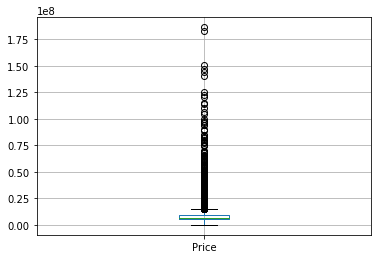

In [30]:
df.boxplot('Price')

Заметим, что в столбце, содержащем информацию о ценах, присутствуют выбросы, будет разумным исправить наш набор данных, взяв данные в диапазоне от 25%-1.5*IQR до 75%+1.5*IQR, где IQR - межквартильный размах

In [31]:
IQR = df['Price'].quantile(0.75) - df['Price'].quantile(0.25)
df = df[(df['Price'] < (df['Price'].quantile(0.75)+1.5*IQR)) & (df['Price'] > (df['Price'].quantile(0.25)-1.5*IQR))]
len(df)

8243

Посмотрим, какоой вид примет ящиковая диграмма после удаления аномалий

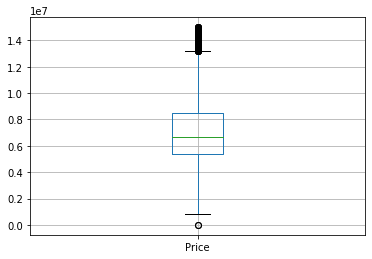

In [32]:
df.boxplot('Price')

Большое количество выбросов сверху все еще сохраняется, проведем прошлый шаг еще раз

In [33]:
IQR = df['Price'].quantile(0.75) - df['Price'].quantile(0.25)
df = df[(df['Price'] < (df['Price'].quantile(0.75)+1.5*IQR)) & (df['Price'] > (df['Price'].quantile(0.25)-1.5*IQR))]
len(df)

8012

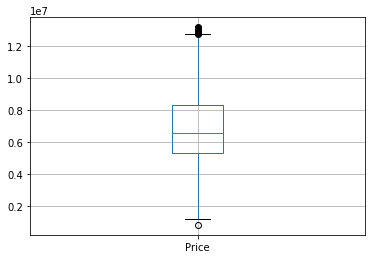

In [34]:
df.boxplot('Price')

In [35]:
df['Price'].describe()

count    8.012000e+03
mean     6.916429e+06
std      2.281163e+06
min      8.000000e+05
25%      5.324625e+06
50%      6.552930e+06
75%      8.300000e+06
max      1.319000e+07
Name: Price, dtype: float64

Теперь рассмотрим распределение значений в столбце Price:

C:\MAX\anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


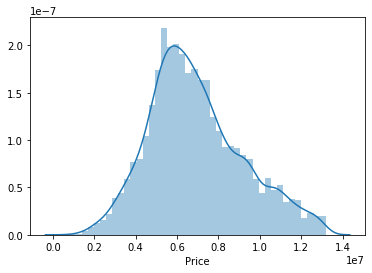

In [36]:
target = df.Price
# строим график, чтобы посмотреть на распределение целевой функции
sns.distplot(target)
plt.show()

Для того, чтобы изучить связи между признаками в датасете построим pairplot():

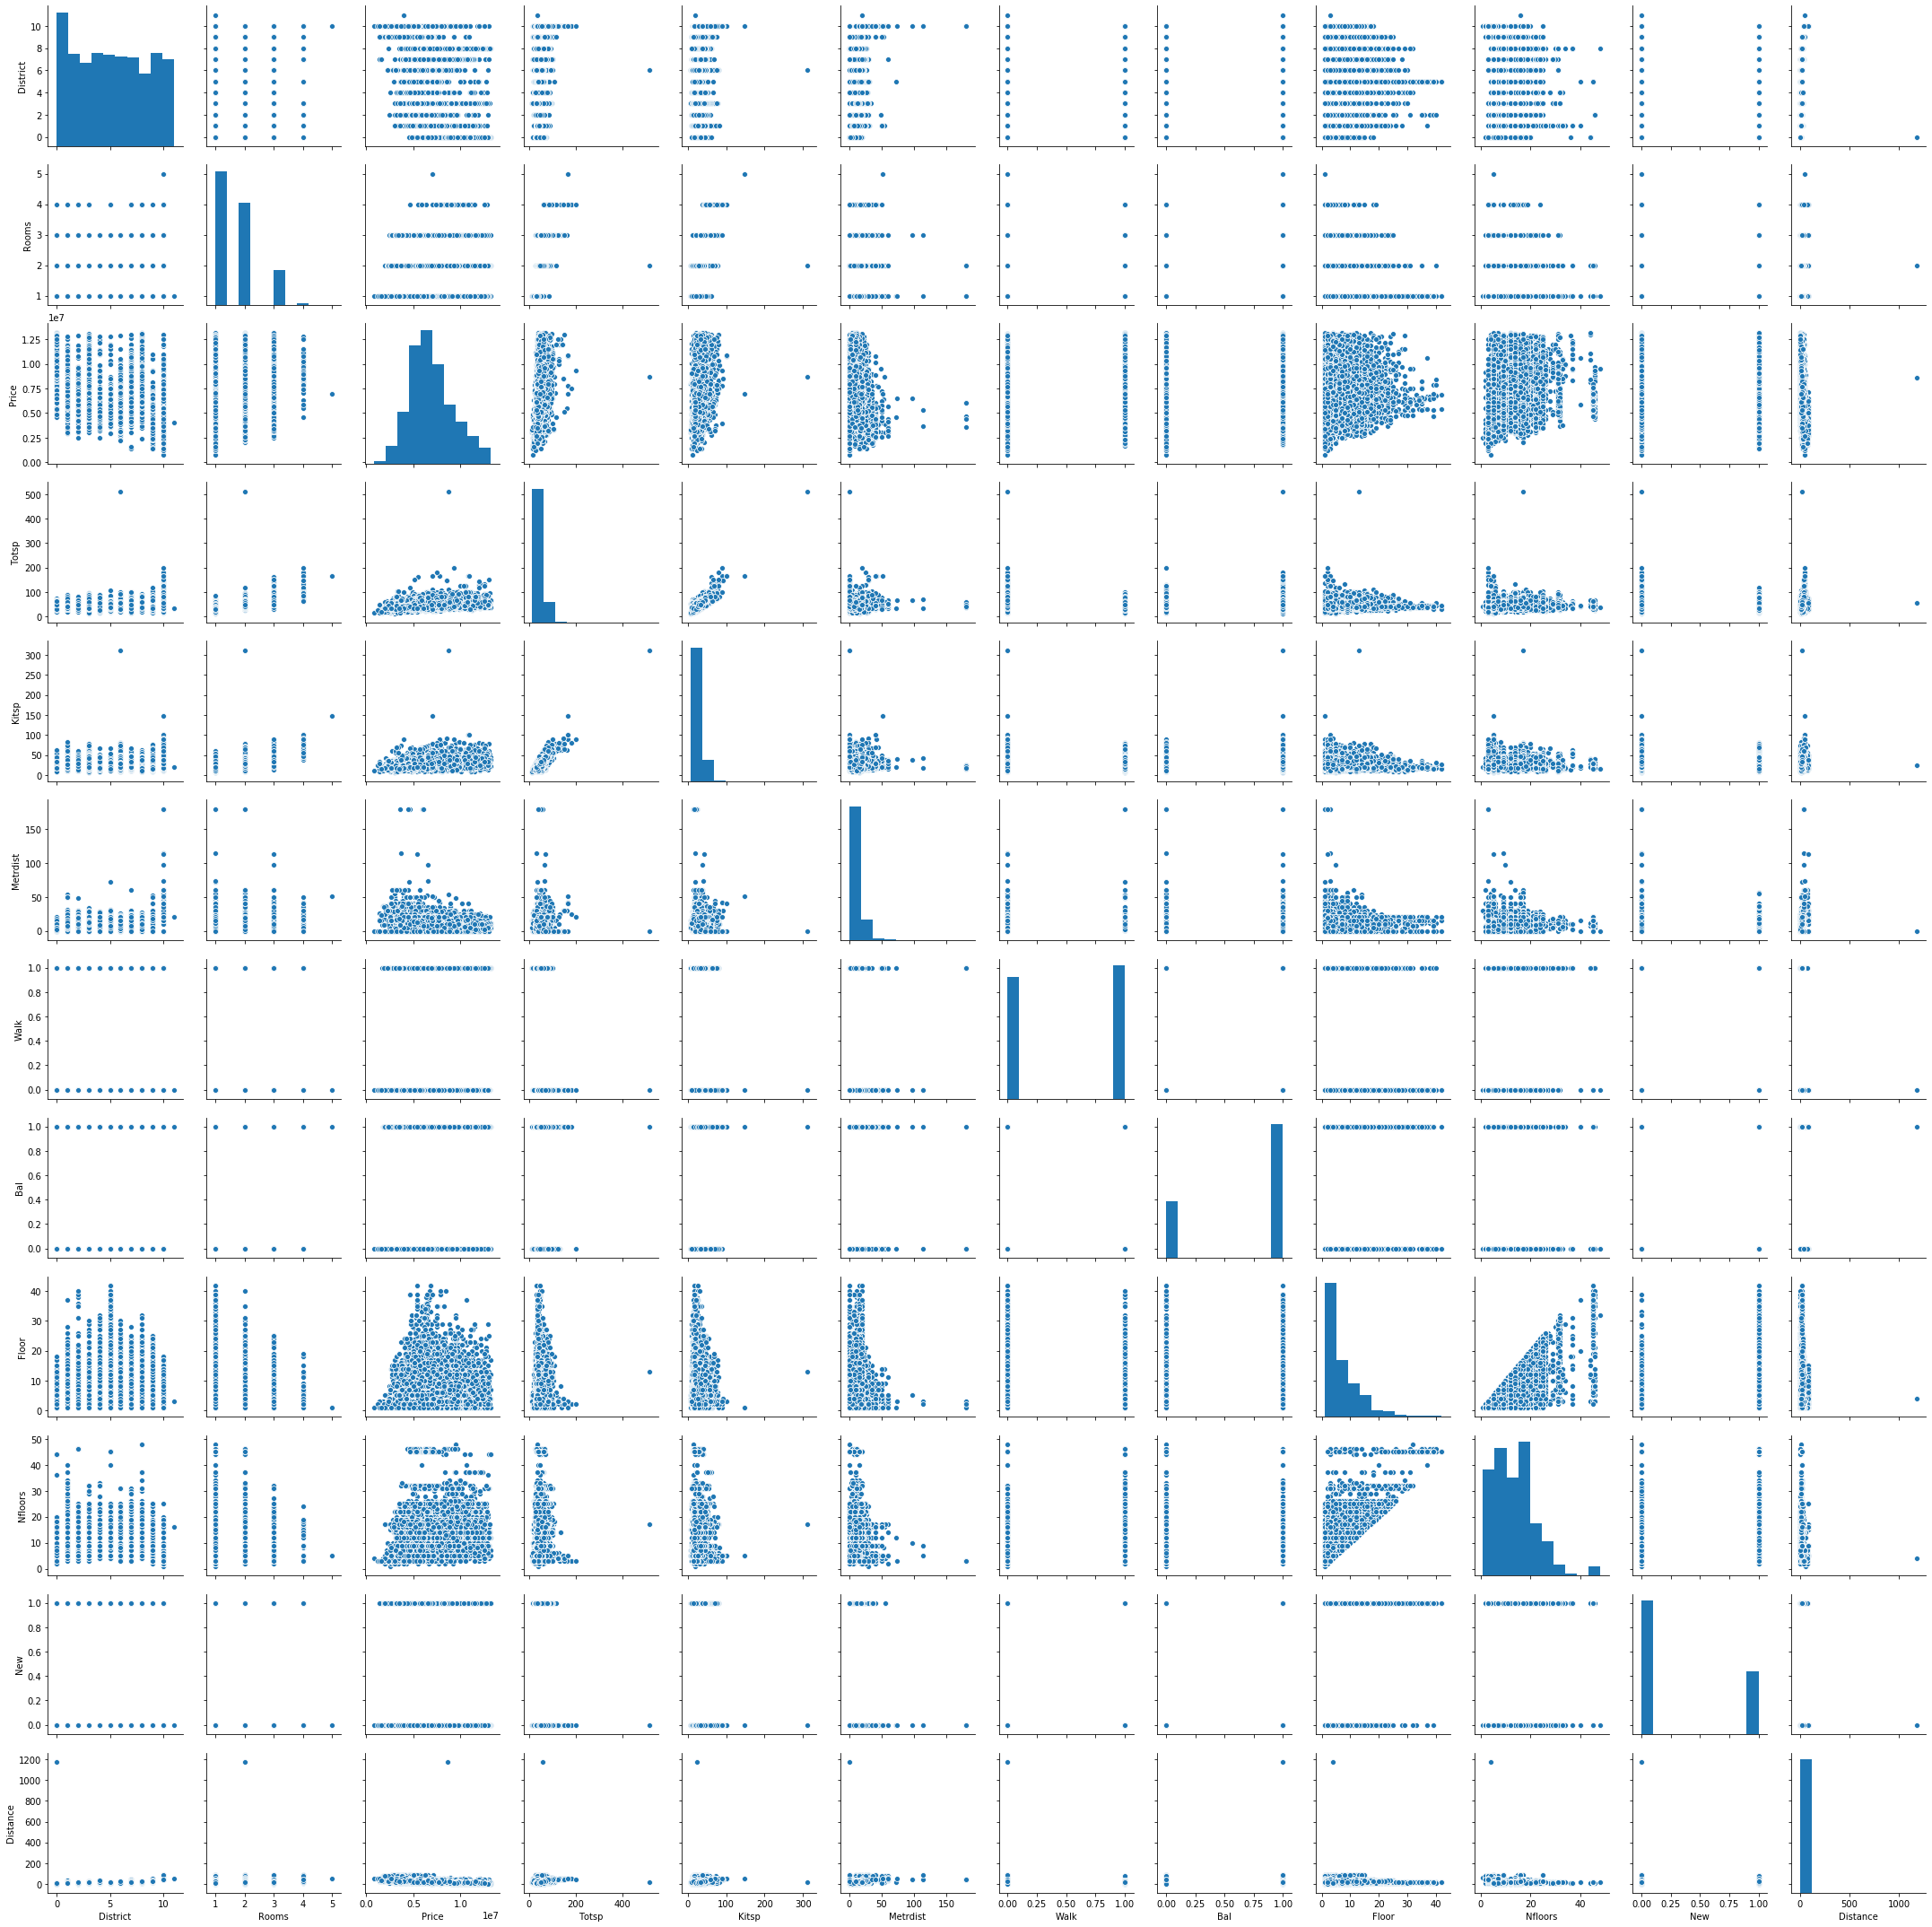

In [37]:
sns.pairplot(df)

Из всего множества графиков, представленных выше, можно заметить, что признаки Kitsp и Totsp достаточно сильно коррелируют.
Для проверки построим корреляционную матрицу для нашего набора данных 

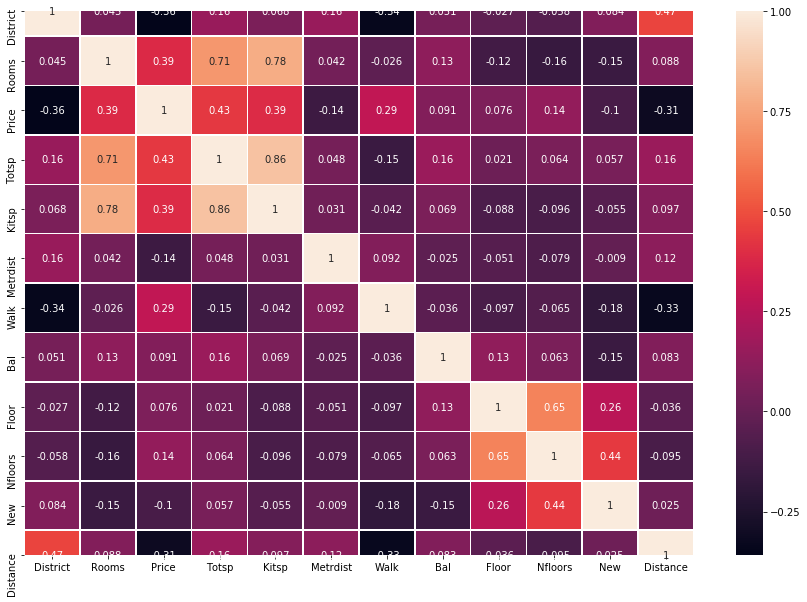

In [38]:
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
sns.heatmap(df.corr(), ax=ax,linewidths=.5,annot = True)

Действительно, получили коэффициент корреляции равный 0.86 между Kitsp и Totsp

Text(0.5, 1.0, 'Price by district')

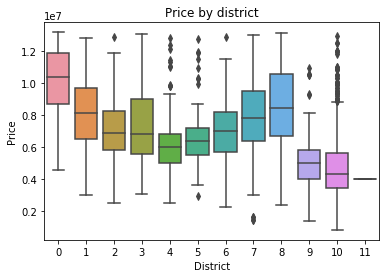

In [39]:
gb_price = sns.boxplot(x = 'District',y = 'Price', data = df)
gb_price.set_title('Price by district')

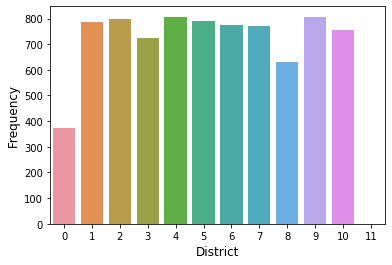

In [40]:
plt.figure()
sns.barplot(x=df.District.value_counts().index, y=df.District.value_counts())
plt.ylabel('Frequency', fontsize=12)
plt.xlabel('District', fontsize=12)
plt.show()

В наборе данных представлены квартиры из всех районов кроме Зеленограда. Остальные 11 округов представлены достаточно равномерно.

# Модели

Прежде чем приступать к анализу моделей, стоит импортировать необходимые библиотеки, а также провести разбиение на тренировочную и тестовую выборку.

In [41]:
from sklearn.linear_model import (LinearRegression, LassoCV, RidgeCV, Lasso, Ridge )
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import (StandardScaler, MinMaxScaler, Normalizer)
from sklearn.metrics import mean_squared_error as mse,mean_squared_log_error as msle

models = ['LinearRegression','RidgeCV','KNN','DecesionTree','GradientBoosting','RandomForest']
r2_train = []
r2_test = []
rmse = []
msle_list = []
time_list = []
metrics = ['R^2 on train','R^2 on test','RMSE','MSLE','TIME']

В Х запишем все признаки, отобранные в ходе предварительного анализа, как влияющие на цену квартиры. у отведем под предсказываемую величину, в данной задаче это цена такого актива, как квартира.

In [42]:
X = df.drop(['Price'], axis=1)
y = df.Price

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Первым делом рассмотрим одну из самых простых моделей регресии - линейную регрессию.

# Линейные модели

In [44]:
t1 = time()
model = LinearRegression(normalize = True)
model.fit(X_train,y_train)
pred1 = model.predict(X_test)
r2_1 = model.score(X_train,y_train)
r_1 = model.score(X_test,y_test)
rmse_1 = mse(y_test,pred1,squared = False)
msle1 = msle(y_test,pred1)
t2 = time()
t_1 = t2-t1
r2_train.append(r2_1)
r2_test.append(r_1)
rmse.append(rmse_1)
msle_list.append(msle1)
time_list.append(t_1)

Значение коэффициента детерминации получилось равным 0.5, что свидетельствует не о совсем хорошем качестве модели. Также важно рассмотреть такую метрику, как RMSE. В нашем случае средняя ошибка равна 2136453.346. На первый взгляд ошибка в более, чем 2 миллиона кажется катастрофической. Однако если посмотреть на процент отклонения относительно средней цены квартир на рынке, то он будет равен 30%, что, несомненно, является достаточно большой ошибкой, но не столь катастрофической, как это могло показаться изначально.  

In [45]:
rmse_1/df['Price'].mean() ## расчет процента ошибки от среднего значения

0.23369877020465

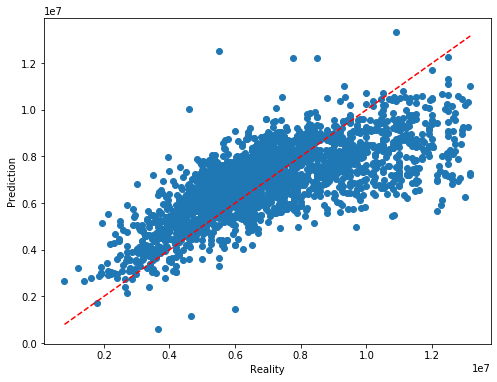

In [46]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, pred1)
plt.xlabel('Reality')
plt.ylabel('Prediction')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')

In [47]:
t1 = time()
model2 = RidgeCV([0.001,0.01,0.1])
model2.fit(X_train,y_train)
pred2 = model2.predict(X_test)
r2_2 = model2.score(X_train,y_train)
r_2 = model2.score(X_test,y_test)
rmse_2 = mse(y_test,pred2,squared = False)
msle2 = msle(y_test,pred2)
t2 = time()
t_2 = t2-t1
r2_train.append(r2_2)
r2_test.append(r_2)
rmse.append(rmse_2)
msle_list.append(msle2)
time_list.append(t_2)

# DecesionTree & KNN

In [48]:
from sklearn.neighbors import KNeighborsRegressor

In [49]:
t1 = time()
KNregressor = KNeighborsRegressor(3)

KNregressor.fit(X_train, y_train)

print("R^2: {}".format(KNregressor.score(X_test,y_test)))
t2 = time()
print(t2-t1)

R^2: 0.6958940589422228
0.06981492042541504


In [50]:
from sklearn.model_selection import GridSearchCV, cross_val_score
t1 = time()
knn_params = {'n_neighbors': range(1,50)}

nneigh = GridSearchCV(KNregressor, knn_params,
                         cv=5, n_jobs=-1,
                        verbose=True)

nneigh.fit(X_train, y_train) 
t2 = time()
print(t2-t1)

Fitting 5 folds for each of 49 candidates, totalling 245 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    3.3s


6.974713563919067


[Parallel(n_jobs=-1)]: Done 245 out of 245 | elapsed:    6.9s finished


In [51]:
nneigh.best_params_

{'n_neighbors': 5}

In [52]:
t1 = time()
model3 = KNeighborsRegressor(5)
model3.fit(X_train,y_train)
pred3 = model3.predict(X_test)
r2_3 = model3.score(X_train,y_train)
r_3 = model3.score(X_test,y_test)
rmse_3 = mse(y_test,pred3,squared = False)
msle3 = msle(y_test,pred3)
t2 = time()
t_3 = t2-t1
r2_train.append(r2_3)
r2_test.append(r_3)
rmse.append(rmse_3)
msle_list.append(msle3)
time_list.append(t_3)

In [53]:
from sklearn.tree import DecisionTreeRegressor

In [54]:
t1 = time()
dt = DecisionTreeRegressor(max_depth = 5)

dt.fit(X_train, y_train)

print("R^2: {}".format(dt.score(X_test,y_test)))
t2 = time()
print(t2-t1)

R^2: 0.6390246693507267
0.014993906021118164


In [55]:
t1 = time()
dt_params = {'max_depth': range(1,50)}

nneigh = GridSearchCV(dt, dt_params,
                         cv=5, n_jobs=-1,
                        verbose=True)

nneigh.fit(X_train, y_train) 
t2 = time()
print(t2-t1)

Fitting 5 folds for each of 49 candidates, totalling 245 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 200 tasks      | elapsed:    1.7s


2.116201639175415


[Parallel(n_jobs=-1)]: Done 245 out of 245 | elapsed:    2.0s finished


In [56]:
nneigh.best_params_

{'max_depth': 9}

In [57]:
t1 = time()
model4 = DecisionTreeRegressor(max_depth = 9)
model4.fit(X_train,y_train)
pred4 = model4.predict(X_test)
r2_4 = model4.score(X_train,y_train)
r_4 = model4.score(X_test,y_test)
rmse_4 = mse(y_test,pred4,squared = False)
msle4 = msle(y_test,pred4)
t2 = time()
t_4 = t2-t1
r2_train.append(r2_4)
r2_test.append(r_4)
rmse.append(rmse_4)
msle_list.append(msle4)
time_list.append(t_4)

# Градиентный бустинг 

In [58]:
from sklearn.ensemble import GradientBoostingRegressor
t1 = time()
model5 = GradientBoostingRegressor()
model5.fit(X_train,y_train)
pred5 = model5.predict(X_test)
r2_5 = model5.score(X_train,y_train)
r_5 = model5.score(X_test,y_test)
rmse_5 = mse(y_test,pred5,squared = False)
msle5 = msle(y_test,pred5)
t2 = time()
t_5 = t2-t1
r2_train.append(r2_5)
r2_test.append(r_5)
rmse.append(rmse_5)
msle_list.append(msle5)
time_list.append(t_5)

# Случайный лес

In [59]:
from sklearn.ensemble import RandomForestRegressor

In [60]:
t1 = time()
model6 = RandomForestRegressor(300,min_samples_leaf = 1)
model6.fit(X_train,y_train)
pred6 = model6.predict(X_test)
r2_6 = model6.score(X_train,y_train)
r_6 = model6.score(X_test,y_test)
rmse_6 = mse(y_test,pred6,squared = False)
msle6 = msle(y_test,pred6)
t2 = time()
t_6 = t2-t1
r2_train.append(r2_6)
r2_test.append(r_6)
rmse.append(rmse_6)
msle_list.append(msle6)
time_list.append(t_6)

# Сравнение моделей

In [61]:
l_metr = [r2_train,r2_test,rmse,msle_list,time_list]       
results = pd.DataFrame(data=l_metr,index=metrics, columns=models)
results.head(2).style.highlight_max(axis='columns')

,LinearRegression,RidgeCV,KNN,DecesionTree,GradientBoosting,RandomForest
R^2 on train,0.490856,0.490856,0.811888,0.870452,0.839464,0.980993
R^2 on test,0.510756,0.510756,0.702373,0.760642,0.807809,0.853566


In [62]:
results.tail(3).style.highlight_min(axis='columns')

,LinearRegression,RidgeCV,KNN,DecesionTree,GradientBoosting,RandomForest
RMSE,1.61636e+06,1.61636e+06,1.2607e+06,1.13058e+06,1.01308e+06,884294
MSLE,0.0564504,0.0564504,0.0331898,0.0268396,0.0223964,0.0170269
TIME,0.0309961,0.0169549,0.254915,0.0259309,0.714185,8.16809


# Визаулизация результатов для 80 объектов из тестовой выборки 

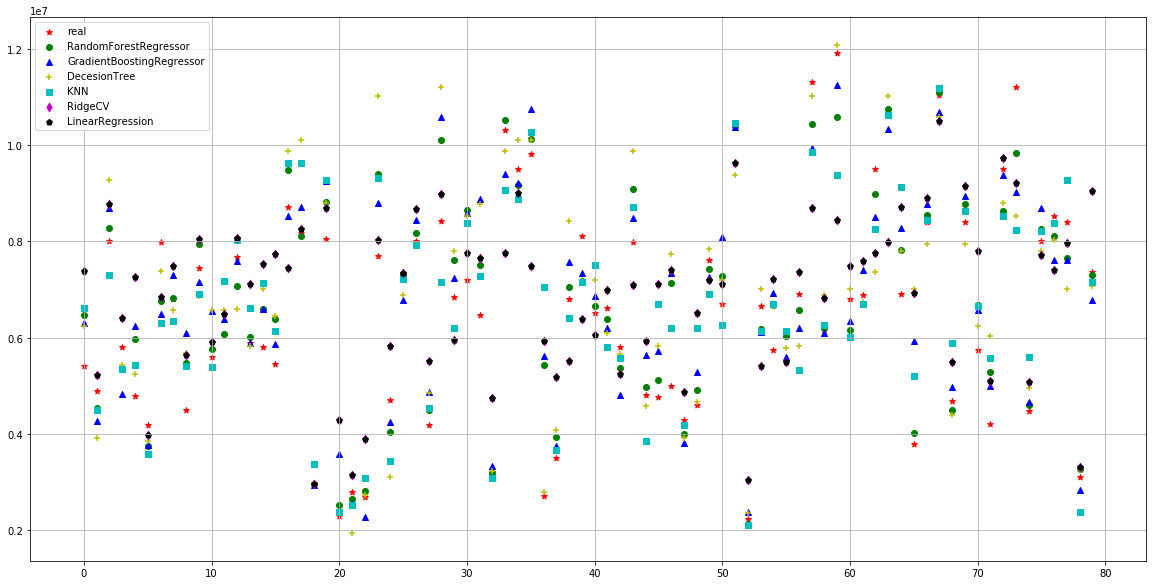

In [63]:

pred = pd.DataFrame({
    'pred1': pred1[130:210],
    'pred2': pred2[130:210],
    'pred3': pred3[130:210],
    'pred4': pred4[130:210],
    'pred5': pred5[130:210],
    'pred6': pred6[130:210],
    'real': np.array(y_test)[130:210]})
plt.figure(figsize=(20,10))
plt.scatter(list(range(len(pred['real']))), pred['real'],c = 'r',marker = '*' , label = 'real');
plt.scatter(list(range(len(pred['pred6']))), pred['pred6'], c = 'g',marker = 'o' ,label='RandomForestRegressor');
plt.scatter(list(range(len(pred['pred5']))), pred['pred5'], c = 'b',marker = '^' ,label='GradientBoostingRegressor');
plt.scatter(list(range(len(pred['pred4']))), pred['pred4'],c = 'y',marker = '+' , label='DecesionTree');
plt.scatter(list(range(len(pred['pred3']))), pred['pred3'], c = 'c',marker = 's' ,label='KNN');
plt.scatter(list(range(len(pred['pred2']))), pred['pred2'], c = 'm',marker = 'd' ,label='RidgeCV');
plt.scatter(list(range(len(pred['pred1']))), pred['pred1'], c = 'k',marker = 'p' ,label='LinearRegression');
plt.grid()
plt.legend()
plt.show()

#  Будем использовать случайный лес тк он показал наиболее хорошую работу, поработаем над улучшением модели

Первым делом найдем лучшие гиперпараметры для нашец модели

In [64]:
n_estimators = range(300,400,10)
max_depth = range(30,40)
min_samples_leaf = range(1,2)
param_grid = {'n_estimators': n_estimators,
               'max_depth': max_depth,
               'min_samples_leaf': min_samples_leaf}
gs = GridSearchCV(model6, param_grid, cv = 5, verbose = True, n_jobs=-1)
gs.fit(X_train, y_train)
rfc_3 = gs.best_estimator_
gs.best_params_

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  6.3min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed: 14.7min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed: 16.5min finished


{'max_depth': 35, 'min_samples_leaf': 1, 'n_estimators': 350}

In [65]:
t1 = time()
rf = RandomForestRegressor(350,min_samples_leaf = 1,max_depth = 35)
rf.fit(X_train,y_train)
pred_rf = rf.predict(X_test)
r_rf_train = rf.score(X_train,y_train)
r_rf_test = rf.score(X_test,y_test)
t2 = time()
rmse_rf= mse(y_test, pred_rf,squared = False)
time_rf = t2-t1
msle_rf = msle(y_test,pred_rf)
print('R^_train = '+str(r_rf_train)+' R^2_test = '+str(r_rf_test)+' RMSE = '+str(rmse_rf)+' MSLE'+str(msle_rf)+' Time = '+str(time_rf))

R^_train = 0.9811218520596913 R^2_test = 0.8549203908743733 RMSE = 880195.0054874066 MSLE0.016954393369654357 Time = 8.5518057346344


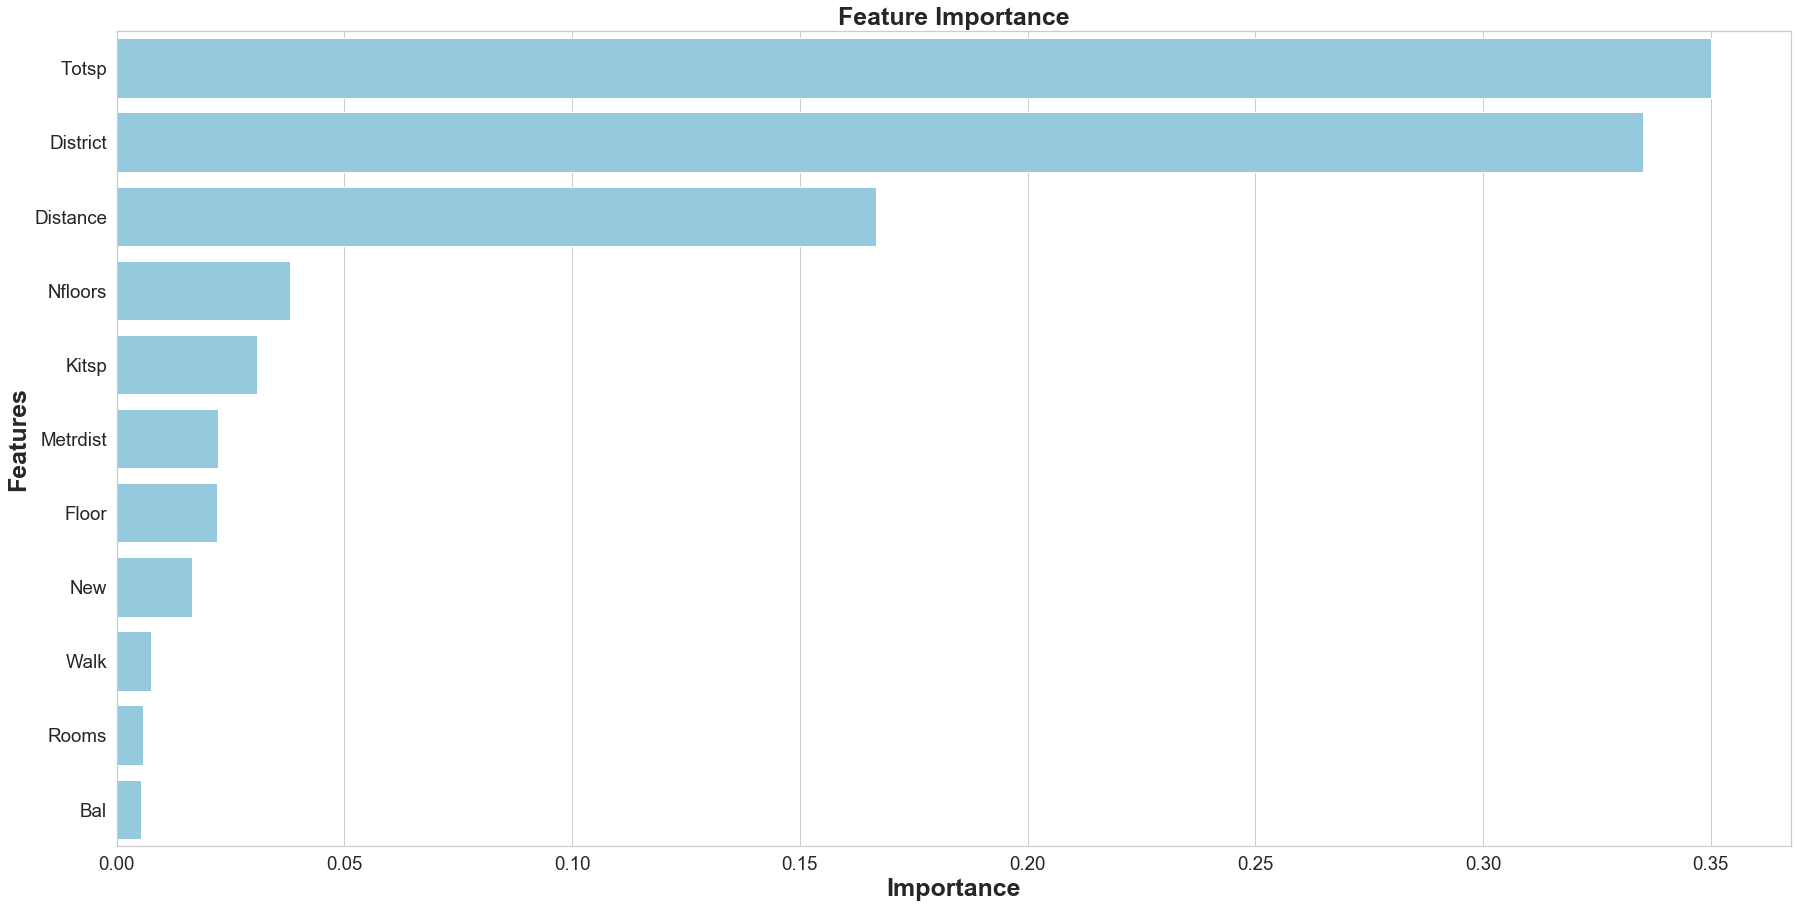

None

,Features,Gini-Importance
0,Totsp,0.350044
1,District,0.335071
2,Distance,0.166746
3,Nfloors,0.037998
4,Kitsp,0.030813
5,Metrdist,0.022132
6,Floor,0.021932
7,New,0.016619
8,Walk,0.007424
9,Rooms,0.005835


0.5998828411102295


In [66]:
t1 = time()
feats = {}
for feature, importance in zip(X.columns, rf.feature_importances_):
    feats[feature] = importance
importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-Importance'})
importances = importances.sort_values(by='Gini-Importance', ascending=False)
importances = importances.reset_index()
importances = importances.rename(columns={'index': 'Features'})
sns.set(font_scale = 5)
sns.set(style="whitegrid", color_codes=True, font_scale = 1.7)
fig, ax = plt.subplots()
fig.set_size_inches(30,15)
sns.barplot(x=importances['Gini-Importance'], y=importances['Features'], data=importances, color='skyblue')
plt.xlabel('Importance', fontsize=25, weight = 'bold')
plt.ylabel('Features', fontsize=25, weight = 'bold')
plt.title('Feature Importance', fontsize=25, weight = 'bold')
display(plt.show())
display(importances)
t2 = time()
print(t2-t1)

Теперь зададимся вопросом о том, как можно улучшить базовую RF-модель. С использованием методики снижения размерности пространства признаков можно представить исходный набор данных через меньшее количество переменных и при этом снизить объём вычислительных ресурсов, необходимых для обеспечения работы модели. Используя PCA, можно изучить кумулятивную выборочную дисперсию этих признаков для того чтобы понять то, какие признаки объясняют большую часть дисперсии в данных.
Инициализируем объект PCA (pca_test), указывая количество компонент (признаков), которые нужно рассмотреть. Мы устанавливаем этот показатель в 11 для того чтобы увидеть объяснённую дисперсию всех сгенерированных компонент до того, как примем решение о том, сколько компонент нам понадобится. Затем передаём в pca_test масштабированные данные X_train, пользуясь методом pca_test.fit(). После этого визуализируем данные.

In [67]:
import numpy as np
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_train_scaled = ss.fit_transform(X_train)
X_test_scaled = ss.transform(X_test)
y_train = np.array(y_train)

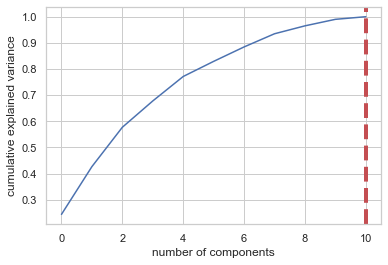

None

,Cumulative Variance Ratio,Explained Variance Ratio
0,0.243638,0.243638
1,0.426284,0.182646
2,0.576907,0.150623
3,0.677587,0.100680
4,0.771208,0.093622
5,0.829068,0.057859
6,0.884326,0.055259
7,0.934719,0.050392
8,0.964998,0.030280
9,0.989926,0.024928


0.3161294460296631


In [68]:
from sklearn.decomposition import PCA
t1 = time()
pca_test = PCA(n_components=11)
pca_test.fit(X_train_scaled)
sns.set(style='whitegrid')
plt.plot(np.cumsum(pca_test.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.axvline(linewidth=4, color='r', linestyle = '--', x=10, ymin=0, ymax=1)
display(plt.show())
evr = pca_test.explained_variance_ratio_
cvr = np.cumsum(pca_test.explained_variance_ratio_)
pca_df = pd.DataFrame()
pca_df['Cumulative Variance Ratio'] = cvr
pca_df['Explained Variance Ratio'] = evr
display(pca_df.head(10))
t2 = time()
print(t2-t1)

После того, как число используемых компонент превышает 10, рост их количества не очень сильно повышает объяснённую дисперсию

Если взглянуть на вышеприведённый датафрейм, то окажется, что использование PCA для перехода от 11 переменных к 10 компонентам позволяет объяснить 98.86% дисперсии данных. Последняя компонента объясняет чуть более 1% дисперсии, а это значит, что от нее мы можем отказаться. Следуя этой логике, воспользуемся PCA для уменьшения числа компонент с 11 до 10 для X_train и X_test. Запишем эти искусственно созданные наборы данных «пониженной размерности» в X_train_scaled_pca и в X_test_scaled_pca.

In [69]:
t1 = time()
pca = PCA(n_components=10)
pca.fit(X_train)
X_train_scaled_pca = pca.transform(X_train)
X_test_scaled_pca = pca.transform(X_test)
t2 = time()
print(t2-t1)

0.06533479690551758


Теперь мы можем передать в ещё одну базовую RF-модель данные X_train_scaled_pca и y_train и можем узнать о том, есть ли улучшения в точности предсказаний, выдаваемых моделью.


In [70]:
t1 = time()
rf1 = RandomForestRegressor(350,min_samples_leaf = 1,max_depth = 35)
rf1.fit(X_train_scaled_pca, y_train)
display(rf1.score(X_train_scaled_pca, y_train))
t2 = time()
print(t2-t1)

0.9731794288719086

14.805249452590942


In [71]:
pred = rf1.predict(X_test_scaled_pca)
rmse = mse(y_test, pred,squared = False)
rmse

1057211.2843675767

К сожалению, средняя ошибка новой модели увеличилась по сравнению с начальной

Random Forest: , Max_depth 1  Точность 0.2550402795500153
Random Forest: , Max_depth 2  Точность 0.439699698248625
Random Forest: , Max_depth 3  Точность 0.5391555658558457
Random Forest: , Max_depth 4  Точность 0.6237535080975136
Random Forest: , Max_depth 5  Точность 0.685481024599369
Random Forest: , Max_depth 6  Точность 0.740042118061098
Random Forest: , Max_depth 7  Точность 0.7773265760386137
Random Forest: , Max_depth 8  Точность 0.80467194897147
Random Forest: , Max_depth 9  Точность 0.8231278345851508
Random Forest: , Max_depth 10  Точность 0.8354272256118015
Random Forest: , Max_depth 11  Точность 0.8414266370152387
Random Forest: , Max_depth 12  Точность 0.8468522367431254
Random Forest: , Max_depth 13  Точность 0.8506739259501291
Random Forest: , Max_depth 14  Точность 0.852187780116999
Random Forest: , Max_depth 15  Точность 0.853698285596249
Random Forest: , Max_depth 16  Точность 0.8549458400274235
Random Forest: , Max_depth 30  Точность 0.8549914567246244


Text(0, 0.5, 'Точность алгоритма')

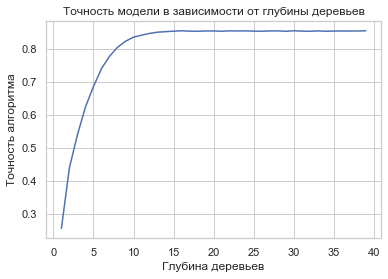

In [72]:
gmd=np.arange(1,40,1)
facc_md=[]
acc=0
for i in gmd:
    scc=0
    model = RandomForestRegressor(n_estimators=350, min_samples_leaf = 1, max_depth = i)
    model.fit(X_train,y_train)
    y_predicted = model.predict(X_test)
    scc=model.score(X_test,y_test)
    facc_md.append(scc)
    if scc > acc:
        acc=scc
        mf=i
        print("Random Forest: , Max_depth", i, " Точность", scc)
plt.plot (gmd,facc_md)
plt.title("Точность модели в зависимости от глубины деревьев")
plt.xlabel("Глубина деревьев")
plt.ylabel("Точность алгоритма")

In [73]:
from sklearn.model_selection import learning_curve
train_sizes, train_scores, test_scores = learning_curve(
    RandomForestRegressor(350,min_samples_leaf = 1,max_depth = 35),
    X = X,
    y = y, 
    scoring = "r2",
    n_jobs = 1
)

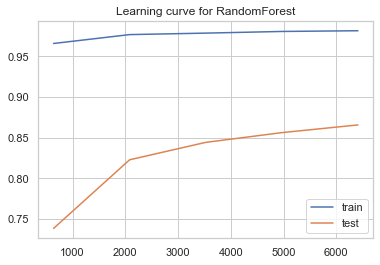

In [74]:
plt.plot(train_sizes, np.mean(train_scores, axis = 1), label = "train")
plt.plot(train_sizes, np.mean(test_scores, axis = 1), label = "test")
plt.title("Learning curve for RandomForest")
plt.legend()


# Сравнение результатов лучшей модели и тестовых значений

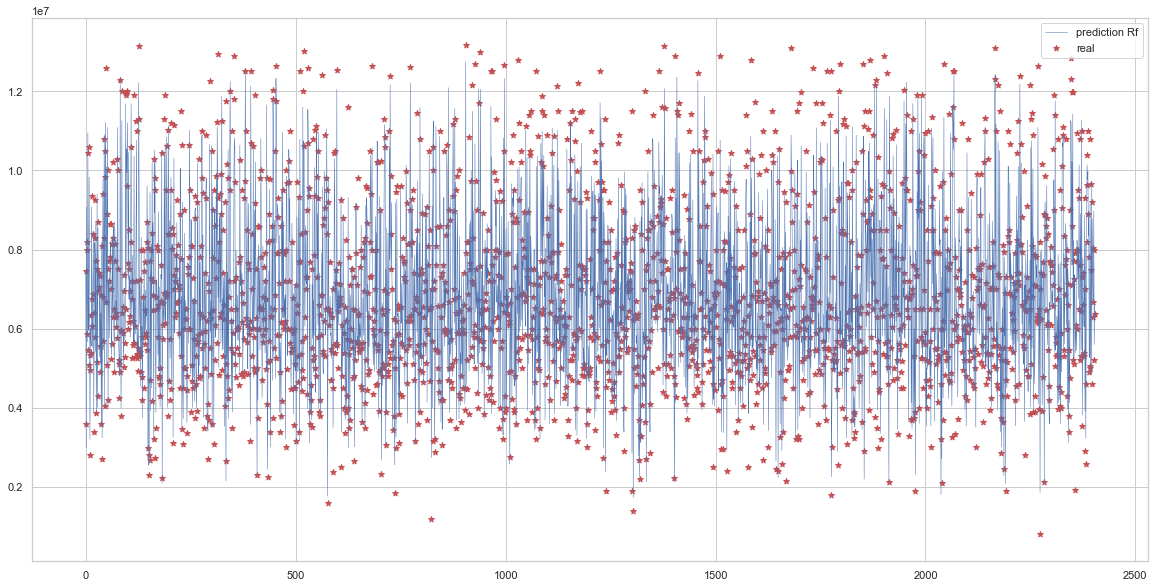

In [74]:
pred = pd.DataFrame({
    'pred_rf': pred_rf,
    'real': y_test})
plt.figure(figsize=(20,10))
plt.plot(list(range(len(pred['pred_rf']))), pred['pred_rf'], label = 'prediction Rf',linewidth = 0.5);
plt.scatter(list(range(len(pred['real']))), pred['real'],c = 'r',marker = '*' , label = 'real');
plt.legend()
plt.show()

# Попробуем изменить предобработку данных, с целью улучшения модели. В этот раз не будем создавать стобец с расстоянием до центра, а оставим географические координаты, как отдельные признаки

In [75]:
df1 = pd.read_csv('flats.csv')
df1.head()

,Unnamed: 0,Lat,Lon,District,Small_district,Rooms,Price,Price_duplicate,Totsp,Livesp,...,Stname,Metrdist,Walk,Brick,Tel,Bal,Floor,Nfloors,New,Link
0,1,55.536573,37.158982,10,NaN,2,6800000.0,6800000.0,73.2,14.4,...,Тропарево,15.0,0.0,NaN,0,1,3.0,4.0,0,http://www.cian.ru/sale/flat/148936137/
1,2,55.823156,37.500881,1,NaN,2,9600000.0,9600000.0,55.0,10.0,...,Войковская,5.0,1.0,NaN,0,0,3.0,6.0,0,http://www.cian.ru/sale/flat/2462671/
2,3,55.878750,37.538587,1,NaN,2,7529815.0,7529815.0,61.2,NaN,...,NaN,NaN,NaN,NaN,0,1,2.0,21.0,1,http://www.cian.ru/sale/flat/43992990/
3,4,55.739336,37.705275,4,Нижегородский,1,4150000.0,4150000.0,30.0,6.5,...,Авиамоторная,24.0,1.0,1.0,1,0,1.0,5.0,0,http://www.cian.ru/sale/flat/151019032/
4,5,55.670757,37.587712,6,Котловка,2,6000000.0,6000000.0,42.0,NaN,...,Профсоюзная,5.0,0.0,0.0,0,1,5.0,5.0,0,http://www.cian.ru/sale/flat/151011793/


In [76]:
del df1['Price_duplicate']

In [77]:
df1.drop(['Unnamed: 0','Small_district','Brick','Livesp','Tel','Link'], axis =1, inplace =True)

In [78]:
del df1['Stname']

In [79]:
cols1 = ['Metrdist','Walk']
for col in cols1:
    df1[col] = df1[col].fillna(0)  ## заполняем числовые данные средним

In [80]:
df1 = df1.dropna(axis='index', how='any', subset=['Price'])

In [81]:
df1 = df1.dropna(axis='index', how='any', subset=['Floor'])

In [82]:
for i in range(len(df1)):
    try:
        if str(df1.at[i,'Nfloors']) == 'nan':
            df1.at[i,'Nfloors'] = float(df1.at[i,'Floor']+random.randint(0,5))  
    except:
        print(str(i)+' строка была удалена ранее')

256 строка была удалена ранее
353 строка была удалена ранее
617 строка была удалена ранее
622 строка была удалена ранее
760 строка была удалена ранее
1260 строка была удалена ранее
1607 строка была удалена ранее
1781 строка была удалена ранее
1984 строка была удалена ранее
2007 строка была удалена ранее
2522 строка была удалена ранее
2900 строка была удалена ранее
3139 строка была удалена ранее
3149 строка была удалена ранее
3513 строка была удалена ранее
3641 строка была удалена ранее
3883 строка была удалена ранее
4175 строка была удалена ранее
4628 строка была удалена ранее
4771 строка была удалена ранее
4920 строка была удалена ранее
4997 строка была удалена ранее
5387 строка была удалена ранее
5759 строка была удалена ранее
5793 строка была удалена ранее
5853 строка была удалена ранее
5923 строка была удалена ранее
6017 строка была удалена ранее
6050 строка была удалена ранее
6190 строка была удалена ранее
6323 строка была удалена ранее
7423 строка была удалена ранее
7529 строка б

In [83]:
k = df1['Kitsp'].mean()/df1['Totsp'].mean()
for i in range(8979):
    try:
        if str(df1.at[i,'Kitsp']) == 'nan':
            df1.at[i,'Kitsp'] = float(round(df1.at[i,'Totsp']*k,1))  
    except:
        print(str(i)+' строка была удалена ранее')

256 строка была удалена ранее
353 строка была удалена ранее
617 строка была удалена ранее
622 строка была удалена ранее
760 строка была удалена ранее
1260 строка была удалена ранее
1607 строка была удалена ранее
1781 строка была удалена ранее
1984 строка была удалена ранее
2007 строка была удалена ранее
2522 строка была удалена ранее
2900 строка была удалена ранее
3139 строка была удалена ранее
3149 строка была удалена ранее
3513 строка была удалена ранее
3641 строка была удалена ранее
3883 строка была удалена ранее
4175 строка была удалена ранее
4628 строка была удалена ранее
4771 строка была удалена ранее
4920 строка была удалена ранее
4997 строка была удалена ранее
5387 строка была удалена ранее
5759 строка была удалена ранее
5793 строка была удалена ранее
5853 строка была удалена ранее
5923 строка была удалена ранее
6017 строка была удалена ранее
6050 строка была удалена ранее
6190 строка была удалена ранее
6323 строка была удалена ранее
7423 строка была удалена ранее
7529 строка б

In [84]:
for col in df1.columns:
    print(f"{df1[col].isna().sum()} NaN elements in {col} feature")

0 NaN elements in Lat feature
0 NaN elements in Lon feature
0 NaN elements in District feature
0 NaN elements in Rooms feature
0 NaN elements in Price feature
0 NaN elements in Totsp feature
0 NaN elements in Kitsp feature
0 NaN elements in Metrdist feature
0 NaN elements in Walk feature
0 NaN elements in Bal feature
0 NaN elements in Floor feature
0 NaN elements in Nfloors feature
0 NaN elements in New feature


In [85]:
IQR = df1['Price'].quantile(0.75) - df1['Price'].quantile(0.25)
df1 = df1[(df1['Price'] < (df1['Price'].quantile(0.75)+1.5*IQR)) & (df1['Price'] > (df1['Price'].quantile(0.25)-1.5*IQR))]
len(df1)

8243

In [86]:
IQR = df1['Price'].quantile(0.75) - df1['Price'].quantile(0.25)
df1 = df1[(df1['Price'] < (df1['Price'].quantile(0.75)+1.5*IQR)) & (df1['Price'] > (df1['Price'].quantile(0.25)-1.5*IQR))]
len(df1)

8012

In [87]:
df1.head()

,Lat,Lon,District,Rooms,Price,Totsp,Kitsp,Metrdist,Walk,Bal,Floor,Nfloors,New
0,55.536573,37.158982,10,2,6800000.0,73.2,40.2,15.0,0.0,1,3.0,4.0,0
1,55.823156,37.500881,1,2,9600000.0,55.0,35.0,5.0,1.0,0,3.0,6.0,0
2,55.878750,37.538587,1,2,7529815.0,61.2,35.9,0.0,0.0,1,2.0,21.0,1
3,55.739336,37.705275,4,1,4150000.0,30.0,18.5,24.0,1.0,0,1.0,5.0,0
4,55.670757,37.587712,6,2,6000000.0,42.0,31.0,5.0,0.0,1,5.0,5.0,0


In [135]:
X = df1.drop(['Price'], axis=1)
y = df1.Price

In [136]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [142]:
t1 = time()
model61 = RandomForestRegressor(100,min_samples_leaf = 1,random_state=42)
model61.fit(X_train,y_train)
pred61 = model61.predict(X_test)
r2_61 = model61.score(X_train,y_train)
r_61 = model61.score(X_test,y_test)
rmse_61 = mse(y_test,pred61,squared = False)
msle61 = msle(y_test,pred61)
t2 = time()
t_61 = t2-t1
print(r2_61)
print(r_61)
print(rmse_61)
print(msle61)
print(t_61)

0.9823996805975844
0.862132281319206
858038.9567048312
0.01626794157248797
2.6309609413146973


Изменение предобработки слегка улучшило нашу модель, применим Grid Search

In [143]:
n_estimators = range(100,400,10)
min_samples_leaf = range(1,2)
param_grid = {'n_estimators': n_estimators,
               'min_samples_leaf': min_samples_leaf}
gs = GridSearchCV(model61, param_grid, cv = 5, verbose = True, n_jobs=-1)
gs.fit(X_train, y_train)
rfc_3 = gs.best_estimator_
print(gs.best_score_)
gs.best_params_


Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   32.3s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:  3.3min finished


0.8655087619686107


{'min_samples_leaf': 1, 'n_estimators': 380}

In [144]:
pred = rfc_3.predict(X_test)
rmse = mse(pred,y_test,squared = False)

In [145]:
rmse

856967.3850059314